In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle

In [6]:
def labels(filename):
    with open(filename, 'rb') as f:
        labels = np.load(f).ravel()
    return labels

In [7]:
training_data_x = pickle.load(open("TS-Train.pkl", "rb")).dropna(axis=1)
test_x = pickle.load(open("TS-Test.pkl", "rb")).dropna(axis=1)

training_data_x = preprocessing.normalize(training_data_x,norm='max',axis=0) #without normalization acc=99%
test_x = preprocessing.normalize(test_x, norm='max',axis=0) #normalization "DOES NOT" affect decision trees BTW

training_data_y = labels("../Labels-Train.npy")
test_y = labels("../Labels-Test.npy")

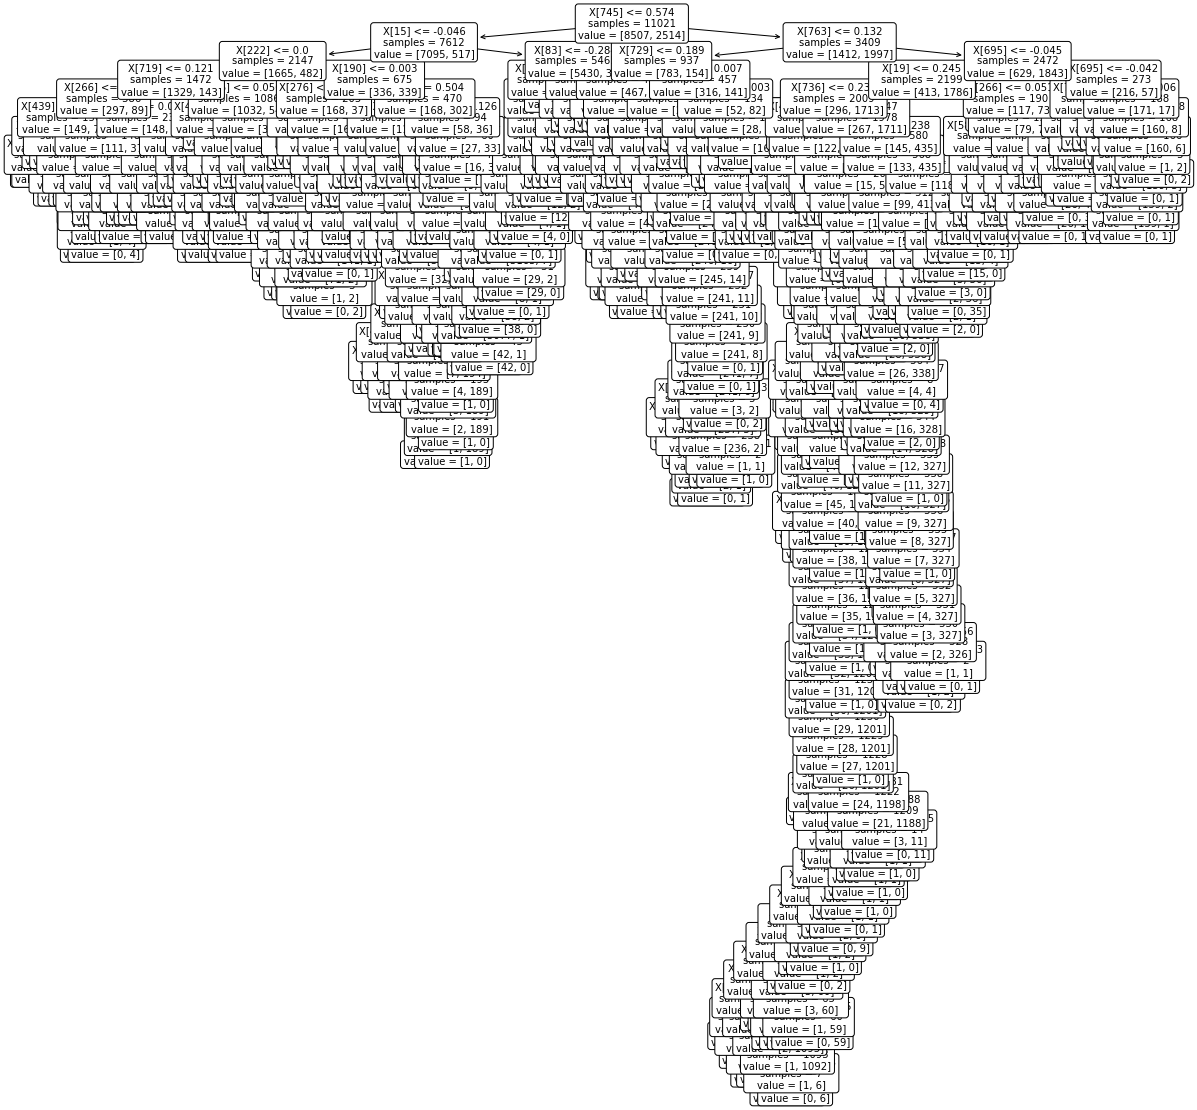

Accuracy percentage:  33.33333333333333 %


In [8]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(training_data_x, training_data_y)

plt.figure(figsize=(20,20))
tree.plot_tree(DTclassifier, fontsize=10, impurity=False, rounded=True)
plt.show()

y_pred = DTclassifier.predict(test_x)
print("Accuracy percentage: ", accuracy_score(test_y, y_pred)*100, "%")

In [ ]:
print(metrics.precision_recall_curve(test_y, y_pred))

(array([0.2, 1. ]), array([1., 0.]), array([1]))


In [12]:
print(metrics.roc_curve(test_y, y_pred))

(array([0. , 0.8, 1. ]), array([0., 1., 1.]), array([2, 1, 0]))


In [2]:
print(metrics.roc_auc_score(test_y, y_pred))

NameError: name 'metrics' is not defined

In [13]:
metrics.confusion_matrix(test_y, y_pred)

array([[1, 4],
       [0, 1]])

In [14]:
print(metrics.classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.20      1.00      0.33         1

    accuracy                           0.33         6
   macro avg       0.60      0.60      0.33         6
weighted avg       0.87      0.33      0.33         6



In [ ]:
with open('tf-models/decision-tree.pkl','wb') as f:
    pickle.dump(DTclassifier,f)

In [ ]:
RFclassifier = RandomForestClassifier()
RFclassifier.fit(training_data_x, training_data_y)
y_pred = RFclassifier.predict(test_x)
print("Accuracy percentage: ", accuracy_score(test_y, y_pred)*100, "%")

In [7]:
with open('tf-models/random-forest.pkl','wb') as f:
    pickle.dump(RFclassifier,f)